In [41]:
import mysql.connector
from mysql.connector import Error
import tweepy
import json
from dateutil import parser
import time
import os
import subprocess
import sqlite3
import re
import en_core_web_sm
import matplotlib.pyplot as plt
from requests_oauthlib import OAuth1
%matplotlib inline

In [33]:


with open("twitter_secrets.json.nogit") as fh:
    secrets = json.loads(fh.read())
    
with open("mySql.json.nogit") as fh:
    passcode = json.loads(fh.read())

In [34]:
consumer_key = secrets['api_key']
consumer_secret = secrets['api_secret']
access_token = secrets['access_token']
access_token_secret = secrets['access_token_secret']
password = passcode['password']

In [35]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [37]:
import sqlite3

conn = sqlite3.connect('twitter.db')
c = conn.cursor()
c.execute('''CREATE TABLE tweets
    (tweetText text,
    user text,
    followers integer,
    date text,
    location text)''')
conn.commit()
conn.close()

In [38]:
import tweepy
import json
import sqlite3

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# DB stuff
conn = sqlite3.connect('twitter.db')
c = conn.cursor()

In [39]:
# Class for defining a Tweet
class Tweet():

    # Data on the tweet
    def __init__(self, text, user, followers, date, location):
        self.text = text
        self.user = user
        self.followers = followers
        self.date = date
        self.location = location

    # Inserting that data into the DB
    def insertTweet(self):

        c.execute("INSERT INTO tweets (tweetText, user, followers, date, location) VALUES (?, ?, ?, ?, ?)",
            (self.text, self.user, self.followers, self.date, self.location))
        conn.commit()

In [40]:
# Stream Listener class
class TweetStreamListener(tweepy.StreamListener):

    # When data is received
    def on_data(self, data):

        # Error handling because teachers say to do this
        try:

            # Make it JSON
            tweet = json.loads(data)

            # filter out retweets
            if not tweet['retweeted'] and 'RT @' not in tweet['text']:

                # Get user via Tweepy so we can get their number of followers
                user_profile = api.get_user(tweet['user']['screen_name'])

                # assign all data to Tweet object
                tweet_data = Tweet(
                    str(tweet['text'].encode('utf-8')),
                    tweet['user']['screen_name'],
                    user_profile.followers_count,
                    tweet['created_at'],
                    tweet['user']['location'])

                # Insert that data into the DB
                tweet_data.insertTweet()
                print("success")

        # Let me know if something bad happens
        except Exception as e:
            print(e)
            pass

        return True

In [41]:
# Driver
if __name__ == '__main__':

    # Run the stream!
    l = TweetStreamListener()
    stream = tweepy.Stream(auth, l)

    # Filter the stream for these keywords. Add whatever you want here!
    stream.filter(track=['NBA All-Star'],languages = ['en'])

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


KeyboardInterrupt: 

In [4]:
conn = sqlite3.connect('twitter.db')
c = conn.cursor()
data_tweet = c.execute('select tweetText from tweets').fetchall()

In [30]:

exclusion_list = ['[^a-zA-Z]','rt', 'http', 'co', 'RT']
exclusions = '|'.join(exclusion_list)
nlp = en_core_web_sm.load()

name_list = []
for i in range(len(data_tweet)):
    text = re.sub(exclusions, ' ' , data_tweet[i][0])
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_=='PERSON' and len(ent.text.strip())>8 and len(ent.text.split())==2:
            name_list.append(ent.text.strip())

In [39]:
from wordcloud import WordCloud
def word_cloud(df):
    plt.subplots(figsize = (12,10))
    wordcloud = WordCloud(
            background_color = 'white',
            width = 1000,
            height = 800).generate(" ".join(df))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

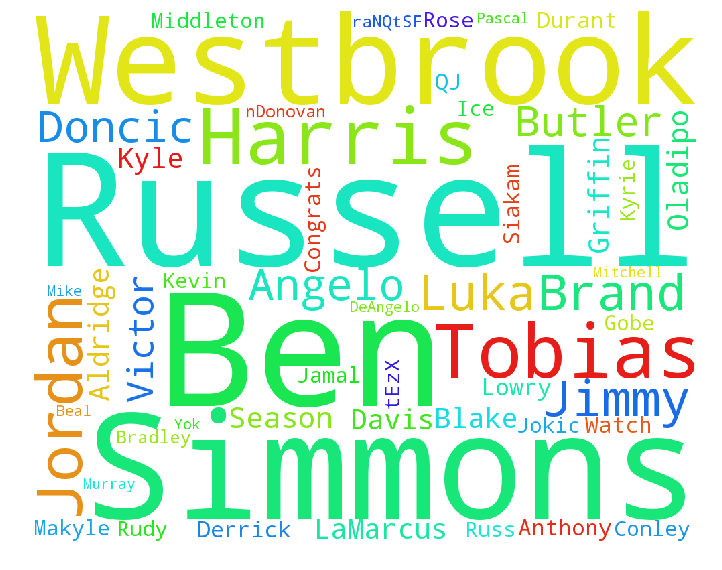

In [42]:
word_cloud(name_list)